## Portfolio Part 3

In this Portfolio task you will continue working with the movielens data collected by the GroupLens Research Project at the University of Minnesota. The columns in the dataset are a little bit different from the ones provided in the previous Portfolio tasks, where the 'rating' column is replaced by the 'feedback' column. There are two values regarding the 'feedback' with 1 indicating the user likes the corresponding movie; otherwise 0. 

The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | feedback | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __feedback__ - the user's feedback towards the movie (1 means 'like'; 0 means 'dislike')
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may like multiple movies and a same movie (i.e., a same movieId) may be preferred by multiple users.


Your high level goal in this notebook is to try to build and evaluate predictive models for feedback from available features - predict the value of the __feedback__ field in the data from some of the other fields. Explore the data, build a model using a selection of features and then do some work on finding out which features provide the most accurate results.

Note: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use a ___simple Logistic Regression model___ and ___one of the more advanced methods___ covered in recent weeks. Accordingly, discuss the performance of the simple and advanced methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('files/movielens_data_feedback.csv')
df.head()

,userId,age,gender,occupation,movieId,feedback,genre,timestamp
0,196,49,M,writer,242,0,Comedy,881250949
1,186,39,F,executive,302,0,Crime,891717742
2,22,25,M,writer,377,0,Children,878887116
3,244,28,M,technician,51,0,Romance,880606923
4,166,47,M,educator,346,0,Drama,886397596


In [3]:
# Find out the catergorical features in the data
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,gender,occupation,genre
0,M,writer,Comedy
1,F,executive,Crime
2,M,writer,Children
3,M,technician,Romance
4,M,educator,Drama


In [4]:
df.groupby('feedback').size()

feedback
0    44625
1    55375
dtype: int64

<AxesSubplot:xlabel='feedback', ylabel='count'>

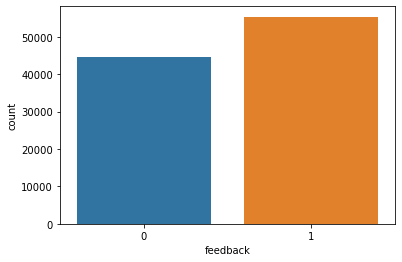

In [5]:
# Visualising countplot
sns.countplot(df['feedback'], label="Count")

In [6]:
# Convert the categorical features (i.e., gender, genre and occupation) into numerical values
from sklearn.preprocessing import OrdinalEncoder

# convert categorical values into numerial values, e.g., genre -> genre_code
ord_enc = OrdinalEncoder(dtype=int)
df[["genre_code", "gender_code", "occupation_code"]] = ord_enc.fit_transform(df[["genre", "gender", "occupation"]])
df[["genre", "genre_code", "occupation", "occupation_code", "gender", "gender_code"]].head(2)

,genre,genre_code,occupation,occupation_code,gender,gender_code
0,Comedy,4,writer,20,M,1
1,Crime,5,executive,6,F,0


In [7]:
df.head(2)

,userId,age,gender,occupation,movieId,feedback,genre,timestamp,genre_code,gender_code,occupation_code
0,196,49,M,writer,242,0,Comedy,881250949,4,1,20
1,186,39,F,executive,302,0,Crime,891717742,5,0,6


In [8]:
df2=df.drop(columns=['gender', 'genre', 'occupation'])
df2.head(2)

,userId,age,movieId,feedback,timestamp,genre_code,gender_code,occupation_code
0,196,49,242,0,881250949,4,1,20
1,186,39,302,0,891717742,5,0,6


In [9]:
# Dividing data into training and testing
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df2.drop(['feedback'], axis=1), df2['feedback'], stratify=df['feedback'], random_state=7)

# checking shapes of each
print("X_train_1 shape: ", X_train_1.shape)
print("y_train_1 shape: ", y_train_1.shape)
print("X_test_1 shape: ", X_test_1.shape)
print("y_test_1 shape: ", y_test_1.shape)

X_train_1 shape:  (75000, 7)
y_train_1 shape:  (75000,)
X_test_1 shape:  (25000, 7)
y_test_1 shape:  (25000,)


### Applying Logistic Regression model

In [10]:
from sklearn.linear_model import LogisticRegression

# training model
lr_1 = LogisticRegression().fit(X_train_1, y_train_1)


In [11]:
# Evaluating trained model on training and test set
from sklearn.metrics import accuracy_score

# making predictions on training and test set
y_pred_train_1 = lr_1.predict(X_train_1)
y_pred_test_1 = lr_1.predict(X_test_1)

# calculating accuracy score on training set
print("Acc on training set1: ", accuracy_score(y_train_1, y_pred_train_1))

# calculating accuracy score on test set
print("Acc on test set1: ", accuracy_score(y_test_1, y_pred_test_1))

Acc on training set1:  0.5537466666666667
Acc on test set1:  0.55376


### Finding important features for the predictive model
Feature importance rates how important each feature is for the model to make predictions.

In [12]:
from sklearn.feature_selection import RFE
rfe = RFE(lr_1, 2)                                                                                                    
rfe_model = rfe.fit(X_train_1, y_train_1)
print("No. of features: ", rfe_model.n_features_)
print("Selected features: ", rfe_model.support_)
print("Features ranking: ", rfe_model.ranking_)

No. of features:  2
Selected features:  [False False  True  True False False False]
Features ranking:  [2 3 1 1 4 6 5]


#### Discuss:
- As can be seen from RFE, 'movieId' and 'timestamp' are two features that most relavent to 'feedback'
- Train models with only one of these two features, respectively, as followed.

In [13]:
# model with one feature-"movieId"
# Dividing data into training and testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df2.drop(['feedback', 'userId','age', 'timestamp',  'genre_code', 'gender_code', 'occupation_code'], axis=1), df2['feedback'], stratify=df['feedback'], random_state=7)

# training model
lr_2 = LogisticRegression().fit(X_train_2, y_train_2)

# making predictions on training and test set
y_pred_train_2 = lr_2.predict(X_train_2)
y_pred_test_2 = lr_2.predict(X_test_2)

# calculating accuracy score on training set
print("Acc on training set2: ", accuracy_score(y_train_2, y_pred_train_2))

# calculating accuracy score on test set
print("Acc on test set2: ", accuracy_score(y_test_2, y_pred_test_2))


Acc on training set2:  0.5888666666666666
Acc on test set2:  0.58984


In [14]:
# model with one feature-"timestamp"
# Dividing data into training and testing
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df2.drop(['feedback', 'userId','age', 'movieId',  'genre_code', 'gender_code', 'occupation_code'], axis=1), df2['feedback'], stratify=df['feedback'], random_state=7)

# training model
lr_3 = LogisticRegression().fit(X_train_3, y_train_3)

# making predictions on training and test set
y_pred_train_3 = lr_3.predict(X_train_3)
y_pred_test_3 = lr_3.predict(X_test_3)

# calculating accuracy score on training set
print("Acc on training set3: ", accuracy_score(y_train_3, y_pred_train_3))

# calculating accuracy score on test set
print("Acc on test set3: ", accuracy_score(y_test_3, y_pred_test_3))

Acc on training set3:  0.5537466666666667
Acc on test set3:  0.55376


#### Disscuss
Though model with only one feature 'movieId' got a bit higher accuracy score, both the training set and test set score are still very low, 0.5889 and 0.5898, respectively. 

### Fine-tuning LR model by changing C values

In [15]:
# training model
lr_1 = LogisticRegression(C=1).fit(X_train_1, y_train_1)

In [16]:
# making predictions on training and test set
y_pred_train_1 = lr_1.predict(X_train_1)
y_pred_test_1 = lr_1.predict(X_test_1)

# calculating accuracy score on training set
print("Acc on training set: ", accuracy_score(y_train_1, y_pred_train_1))

# calculating accuracy score on test set
print("Acc on test set: ", accuracy_score(y_test_1, y_pred_test_1))

Acc on training set:  0.5537466666666667
Acc on test set:  0.55376


#### Discuss
There is no improvement by fine-tuning with changing C to 0.1.

### Analysis
- Accuracy score is close to 0.5. Feedback can not be well predicted from any feature(s) of the dataset in logistic regression models. 
- Feedback has a closer relationship with individual movie regardless of its genre.

### K-Nearest Neighbors Classifier and Model Selection

In [17]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [24]:
# summarize all features
for i in range(X_train_1.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 2.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 4.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected False, Rank: 5.000


#### Discuss: 
'movieId' and 'timestamp' are ranked as two highest features, which is consistant with LR models.

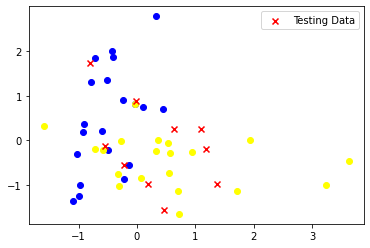

In [35]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=None)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Visualize the generated data
colors = ['blue', 'yellow']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [36]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 10)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
accuracy_train = accuracy_score(y_pred_train, y_train)
accuracy_test = accuracy_score(y_pred_test, y_test)
print('Training accuracy is: ', accuracy_train)
print('Testing accuracy is: ', accuracy_test)

Training accuracy is:  0.775
Testing accuracy is:  0.8


#### Discuss: 
when n_neighbors(K) is 10, the accuracy score of both training set and test set are fairly good. KNN model works well in this case.

### Find the best K-value(n_neighbors)

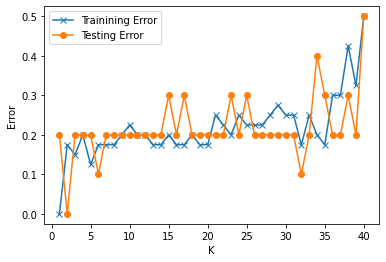

In [37]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

#### Discuss: 
- as can be seen in above plot, when K>35, the error rate of both training set and test set will increase significantly.
- when K<5, although the accuracy of both training set is high, that of test set is low.

### k-fold cross validation in order to find the best K-value.

In [38]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 10)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.8 0.8 0.8 0.4 1.  0.8 0.8 0.8 0.8 1. ]
Average accuracy: 0.8000 +- 0.1549


In [39]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  6
The accuracy:  0.82


### Analysis
- KNN is more suitable model to predict feedback for this dataset than logistic regression model.
- K-value of KNN model should be between 5 and 35.